In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#drive ko link kiya
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#csv file ko read kiya
df=pd.read_csv('/content/drive/MyDrive/csv_files_ML/real_estate_price_size.csv')
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [5]:
#missing values ko chcek kiya
df.isnull()
df.isnull().sum()

,0
price,0
size,0


In [6]:
#handle kiya missing values ko
df.dropna()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [9]:
#feature scaling
X=df['size'].values
y=df['price'].values
#gradient descent ko slow hony sy bacchhany k liye/normalize krny ko
X= (X-X.mean())/X.std()

In [10]:
#splitting data
split=int(0.8* len(X))
X_train=X[:split]
y_train=y[:split]

X_test=X[split:]
y_test=y[split:]

In [16]:
# 1- Hypothesis Function
    # Formula: Ŷ = mx + c or y_pred=theta1*X+theta0
def hypothesis(X,theta0, theta1):
  return theta0+theta1*X



In [19]:
 # 2- Cost Function (Mean Squared Error)
    # Formula: j(m,c) = 1/2n * Σ(y - (mx + c))^2
def cost_function(x,y,theta0, theta1):
  m=len(y)
  y_pred=hypothesis(x,theta0, theta1)
  error=y_pred-y
  cost=(1/(2*m))* np.sum(error**2)
  return cost

In [13]:
  # 3- Optimization Function (Gradient Descent)
    # Formulas:
    # ∂j/∂m = -(1/n) * Σ(X * (y - y_predicted))
    # ∂j/∂c = -(1/n) * Σ(y - y_predicted)
    # ===== Gradient Descent =====
def gradient_descent(X, y, theta0, theta1, alpha, iterations):

    m = len(y)
    cost_history = []

    for i in range(iterations):

        y_pred = hypothesis(X, theta0, theta1)

        d_theta0 = (1/m) * np.sum(y_pred - y)
        d_theta1 = (1/m) * np.sum((y_pred - y) * X)

        theta0 = theta0 - alpha * d_theta0
        theta1 = theta1 - alpha * d_theta1

        cost = cost_function(X, y, theta0, theta1)
        cost_history.append(cost)

    return theta0, theta1, cost_history







In [20]:
# initial values
theta0 = 0
theta1 = 0

# hyperparameters
alpha = 0.05
iterations = 1000

theta0, theta1, cost_history = gradient_descent(
    X_train, y_train, theta0, theta1, alpha, iterations
)


print("Final theta0:", theta0)
print("Final theta1:", theta1)
print("Final Cost:", cost_history[-1])


Final theta0: 293043.19081617886
Final theta1: 66427.76808687102
Final Cost: 752073626.6590488


In [21]:
y_pred_test = hypothesis(X_test, theta0, theta1)


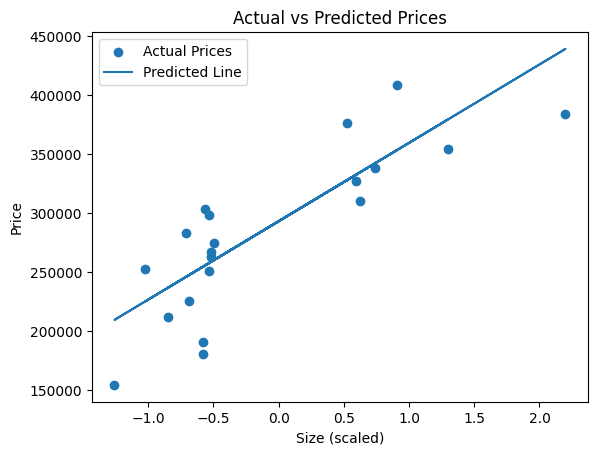

In [22]:
plt.scatter(X_test, y_test, label="Actual Prices")
plt.plot(X_test, y_pred_test, label="Predicted Line")
plt.xlabel("Size (scaled)")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


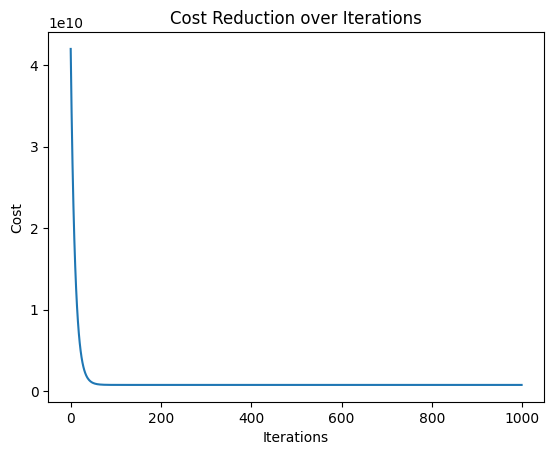

In [23]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction over Iterations")
plt.show()
